In [1]:
import numpy as np 
from tensorflow.keras.datasets import mnist 

# Load the dataset 
(x_train, _), (x_test, _) = mnist.load_data() 

# Normalize the pixel values 
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255. 

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:]))) 
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))) 

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Build Autoencoder

**1. Define the Encoder:**
- Create an input layer with 784 neurons. 
- Add a Dense layer with 64 neurons and ReLU activation. 

**2. Define the Bottleneck:**
- Add a Dense layer with 32 neurons and ReLU activation. 

**3. Define the Decoder:**
- Add a Dense layer with 64 neurons and ReLU activation. 
- Add an output layer with 784 neurons and sigmoid activation. 

**4. Compile the Model:**
- Use the Adam optimizer and binary crossentropy loss.  

In [2]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu')(input_layer) 

# Bottleneck 
bottleneck = Dense(32, activation='relu')(encoded) 

# Decoder 
decoded = Dense(64, activation='relu')(bottleneck) 
output_layer = Dense(784, activation='sigmoid')(decoded) 

# Autoencoder model 
autoencoder = Model(input_layer, output_layer) 

# Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Summary of the model 
autoencoder.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

### Training the autoencoder 
- Use the `fit` method to train the model on the training data. 
- Set the number of epochs to 25 and the batch size to 256.. 
- Use the test data for validation. 

In [3]:
autoencoder.fit(
    x_train, x_train,  
    epochs=25,  
    batch_size=256,  
    shuffle=True,  
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3542 - val_loss: 0.1679
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1595 - val_loss: 0.1366
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1344 - val_loss: 0.1243
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1233 - val_loss: 0.1163
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1165 - val_loss: 0.1119
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1123 - val_loss: 0.1082
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1089 - val_loss: 0.1056
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1062 - val_loss: 0.1032
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1041 - val_loss: 0.1011
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1018 - val_loss: 0.0992
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1000 - val_loss: 0.0982
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

### Evaluating the autoencoder

**1. Reconstruct Images:**
- Use the autoencoder to predict the test data. 
- Compare the original test images with the reconstructed images. 

**2. Visualize the Results:**
- Plot a few examples of original and reconstructed images side by side. 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step


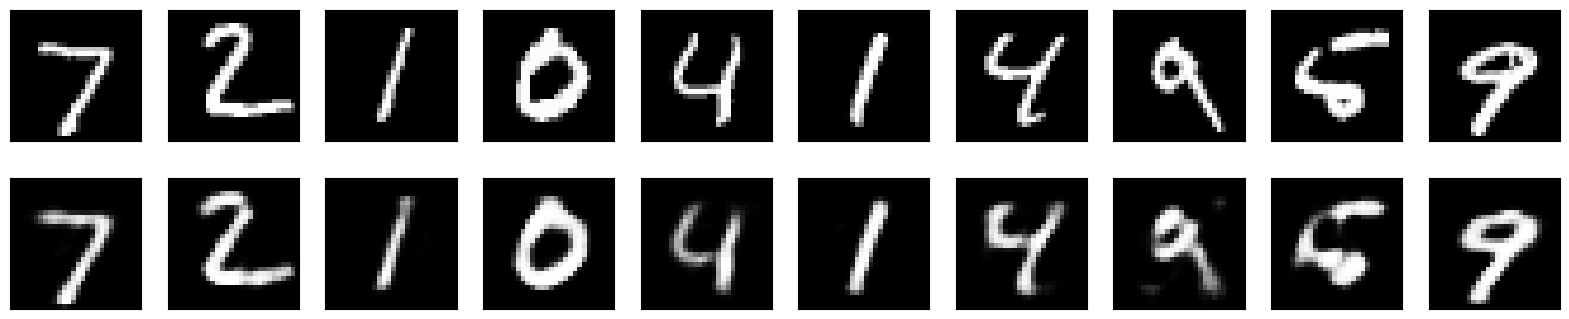

In [4]:
import matplotlib.pyplot as plt 

# Predict the test data 
reconstructed = autoencoder.predict(x_test) 

# Visualize the results 
n = 10  # Number of digits to display 
plt.figure(figsize=(20, 4)) 

for i in range(n): 
    # Display original 
    ax = plt.subplot(2, n, i + 1) 
    plt.imshow(x_test[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

    # Display reconstruction 
    ax = plt.subplot(2, n, i + 1 + n) 
    plt.imshow(reconstructed[i].reshape(28, 28)) 
    plt.gray() 
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 

plt.show()

### Fine-tuning the autoencoder

unfreeze the last four layers and train the model again for a few more epochs.


In [7]:
for layer in autoencoder.layers[-4:]: 
    layer.trainable = True 

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model again
autoencoder.fit(x_train, x_train,  
                epochs=10,  
                batch_size=256,  
                shuffle=True,  
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0947 - val_loss: 0.0912
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0921 - val_loss: 0.0911
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0922 - val_loss: 0.0911
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0922 - val_loss: 0.0907
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0919 - val_loss: 0.0906
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0916 - val_loss: 0.0905
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0917 - val_loss: 0.0904
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0912 - val_loss: 0.0901
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0910 - val_loss: 0.0901


### Denoising images with Autoencoder

**1. Add noise to the data:**
- Add random noise to the training and test data. 
- Train the Autoencoder with noisy data: 
-Train the autoencoder using the noisy images as input and the original images as target. 

**2. Evaluate the denoising performance:**
- Use the autoencoder to denoise the test images. 
- Compare the noisy, denoised, and original images. 

Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2151 - val_loss: 0.1440
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1417 - val_loss: 0.1337
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1334 - val_loss: 0.1291
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1293 - val_loss: 0.1268
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1269 - val_loss: 0.1255
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1259 - val_loss: 0.1244
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1247 - val_loss: 0.1237
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1239 - val_loss: 0.1229
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1234 - val_loss: 0.1230
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1229 - val_loss: 0.1226
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1226 - val_loss: 0.1220
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

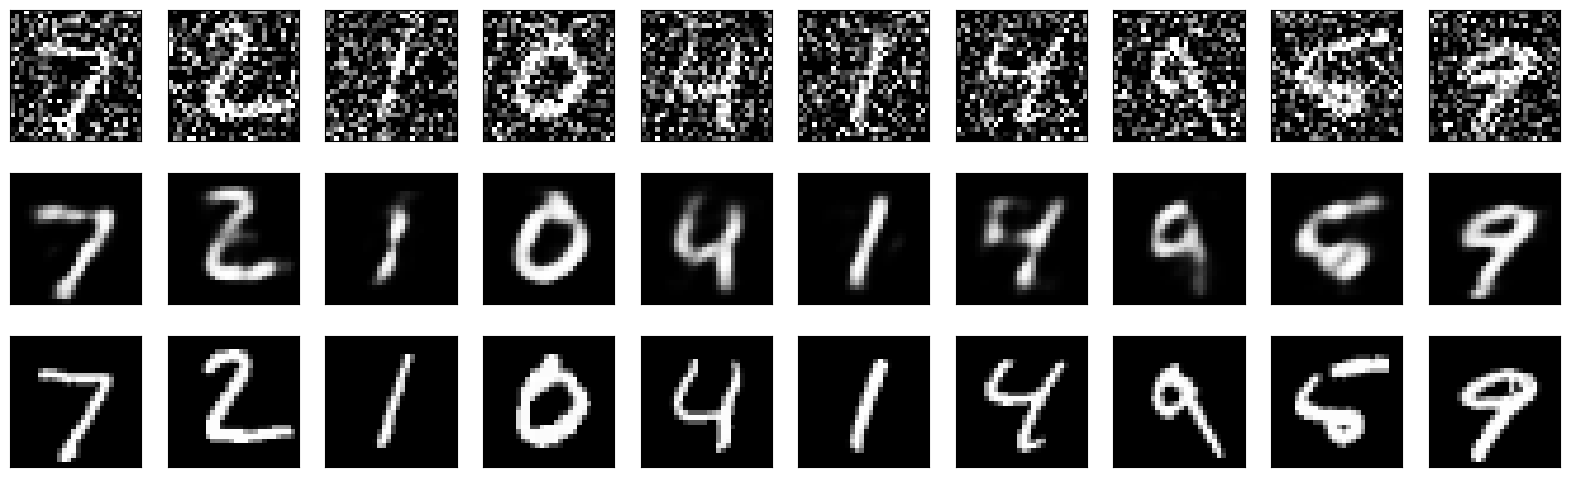

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Exploring Different Bottleneck sizes
**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons). 
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer. 

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256. 
- Use the same preprocessing steps as in the main lab. 

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data. 
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data. 

In [11]:
bottleneck_sizes = [16,32,64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784, ))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=50,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate metrics and compare models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f"Bottleneck size {size} - Test loss: {loss}")


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3732 - val_loss: 0.1922
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1826 - val_loss: 0.1581
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1561 - val_loss: 0.1446
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1432 - val_loss: 0.1346
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1341 - val_loss: 0.1284
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1283 - val_loss: 0.1230
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1240 - val_loss: 0.1206
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1213 - val_loss: 0.1188
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1198 - val_loss: 0.1173
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1187 - val_loss: 0.1165
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1177 - val_loss: 0.1157
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

### Adding regularization to the Autoencoder

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder. 

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256. 

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version. 

In [12]:
from tensorflow.keras.regularizers import l2 

# Encoder with L2 regularization 
input_layer = Input(shape=(784,)) 
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer) 
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded) 

# Decoder with L2 regularization 
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck) 
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded) 

# Autoencoder model with L2 regularization 
autoencoder_regularized = Model(input_layer, output_layer) 
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy') 

# Train the model 
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test)) 

# Evaluate the model 
loss = autoencoder_regularized.evaluate(x_test, x_test) 
print(f'Regularized Autoencoder - Test loss: {loss}')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7519 - val_loss: 0.4414
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4238 - val_loss: 0.3958
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3927 - val_loss: 0.3805
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3779 - val_loss: 0.3675
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3647 - val_loss: 0.3556
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3535 - val_loss: 0.3455
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3439 - val_loss: 0.3375
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3359 - val_loss: 0.3304
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3287 - val_loss: 0.3241
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3228 - val_loss: 0.3180
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3167 - val_loss: 0.3124
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

### Visualization

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


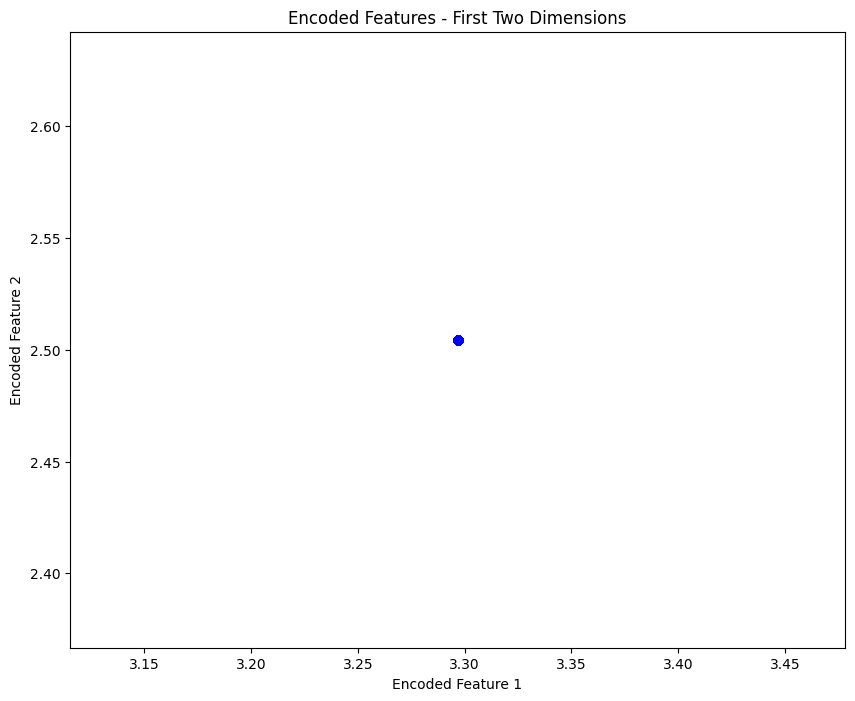

In [13]:
import matplotlib.pyplot as plt 

# Extract the encoder part of the autoencoder 
encoder_model = Model(input_layer, bottleneck) 

# Encode the test data 
encoded_imgs = encoder_model.predict(x_test) 

# Visualize the first two dimensions of the encoded features 
plt.figure(figsize=(10, 8)) 
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5) 
plt.title('Encoded Features - First Two Dimensions') 
plt.xlabel('Encoded Feature 1') 
plt.ylabel('Encoded Feature 2') 
plt.show()